Dataset https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip merupakan kumpulan gambar sel darah yang sudah disegmentasi berjumlah 27,558 gambar cell, dimana label yang dimiliki ada 2 jenis yaitu sel darah yang terinfeksi sel parasit (Parasitized), dan sel darah tidak terinfeksi parasit (Uninfected)

### **1. Load Data**

In [ ]:
#download dataset
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip \
    -O /content/cell_images.zip

--2021-10-12 00:31:49--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/content/cell_images.zip’

/content/cell_image 100%[===================>] 337.08M  14.9MB/s    in 23s     

2021-10-12 00:32:12 (14.8 MB/s) - ‘/content/cell_images.zip’ saved [353452851/353452851]



In [ ]:
#ekstrak data
import os
import zipfile

local_zip = '/content/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

**Sebelum melakukan splitting jalankan fungsi berikut untuk memastikan isi folder hanya berupa gambar png**

In [ ]:
base_dataset = "/content/cell_images"
class_dir = ['Parasitized','Uninfected']

#gabungin base & dir
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)

#cek gambar PNG
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
import os
import shutil
import os.path
from os import path

!mkdir model_cell_images

In [ ]:
#Membuat Folder Training
if path.exists('/content/model_cell_images/training/') == False:
  os.mkdir('/content/model_cell_images/training/')

if path.exists('/content/model_cell_images/training/Parasitized') == False:
  os.mkdir('/content/model_cell_images/training/Parasitized')
  
if path.exists('/content/model_cell_images/training/Uninfected') == False:
  os.mkdir('/content/model_cell_images/training/Uninfected')

In [ ]:
#Membuat Folder Validation
if path.exists('/content/model_cell_images/validation/') == False:
  os.mkdir('/content/model_cell_images/validation/')

if path.exists('/content/model_cell_images/validation/Parasitized') == False:
  os.mkdir('/content/model_cell_images/validation/Parasitized')

if path.exists('/content/model_cell_images/validation/Uninfected') == False:
  os.mkdir('/content/model_cell_images/validation/Uninfected')

**PARASITIZED**

In [ ]:
#membuat variabel untuk menampung data
Parasitized_base = "/content/cell_images/Parasitized"
Parasitized_train = "/content/model_cell_images/training/Parasitized"
Parasitized_validation = "/content/model_cell_images/validation/Parasitized"

In [ ]:
data = os.listdir(Parasitized_base)

#membagi data menjadi 70% train
for file in data[0:int(len(data)* .7)]:
    new_path = shutil.move(f"{Parasitized_base}/{file}", Parasitized_train)

In [ ]:
data2 = os.listdir(Parasitized_base)

#membagi data menjadi 30% test
for file in data2:
    new_path = shutil.move(f"{Parasitized_base}/{file}", Parasitized_validation)

**UNINFECTED**

In [ ]:
#membuat variabel untuk menampung data
Uninfected_base = "/content/cell_images/Uninfected"
Uninfected_train = "/content/model_cell_images/training/Uninfected"
Uninfected_validation = "/content/model_cell_images/validation/Uninfected"

In [ ]:
dataun = os.listdir(Uninfected_base)

#membagi data menjadi 70% train
for file in dataun[0:int(len(dataun) * .7)]:
    new_path = shutil.move(f"{Uninfected_base}/{file}", Uninfected_train)

In [ ]:
dataun2 = os.listdir(Uninfected_base)

#membagi data menjadi 30% test
for file in dataun2:
    new_path = shutil.move(f"{Uninfected_base}/{file}", Uninfected_validation)

**Cek Nama Gambar dan Panjang Gambar**

In [ ]:
training_parasitized = os.listdir(Parasitized_train)
validation_parasitized = os.listdir(Parasitized_validation)
training_uninfected = os.listdir(Uninfected_train)
validaton_uninfected = os.listdir(Uninfected_validation)

#cek jumlah gambar
print("data Parasitized training : " + str(len(training_parasitized)))
print("data Parasitized validation : " + str(len(validation_parasitized)))
print("data Uninfected training : " + str(len(training_uninfected)))
print("data Uninfected validation : " + str(len(validaton_uninfected)))
print('')
print('')

#cek penamaan gambar
print(training_parasitized[0:int(len(training_parasitized) * .001)])
print('')
print(validation_parasitized[0:int(len(validation_parasitized) * .001)])
print('')
print(training_uninfected[0:int(len(training_uninfected) * .001)])
print('')
print(validaton_uninfected[0:int(len(validaton_uninfected) * .001)])

data Parasitized training : 9645
data Parasitized validation : 4134
data Uninfected training : 9645
data Uninfected validation : 4134


['C97P58ThinF_IMG_20150917_151437_cell_175.png', 'C68P29N_ThinF_IMG_20150819_134625_cell_28.png', 'C68P29N_ThinF_IMG_20150819_134830_cell_42.png', 'C48P9thinF_IMG_20150721_164129_cell_33.png', 'C180P141NThinF_IMG_20151201_165659_cell_26.png', 'C70P31_ThinF_IMG_20150813_131330_cell_100.png', 'C68P29N_ThinF_IMG_20150819_133350_cell_149.png', 'C158P119ThinF_IMG_20151115_181859_cell_201.png', 'C118P79ThinF_IMG_20151002_110725_cell_134.png']

['C175P136NThinF_IMG_20151127_141253_cell_257.png', 'C68P29N_ThinF_IMG_20150819_133236_cell_147.png', 'C129P90ThinF_IMG_20151004_133421_cell_111.png', 'C107P68ThinF_IMG_20150924_222535_cell_144.png']

['C179P140ThinF_IMG_20151127_153420_cell_158.png', 'C241NThinF_IMG_20151207_124208_cell_68.png', 'C65P26N_ThinF_IMG_20150818_154714_cell_110.png', 'C213ThinF_IMG_20151106_112603_cell_162.png', 'C96P57ThinF_IMG_20150824_11

**Contoh output soal 1.4**

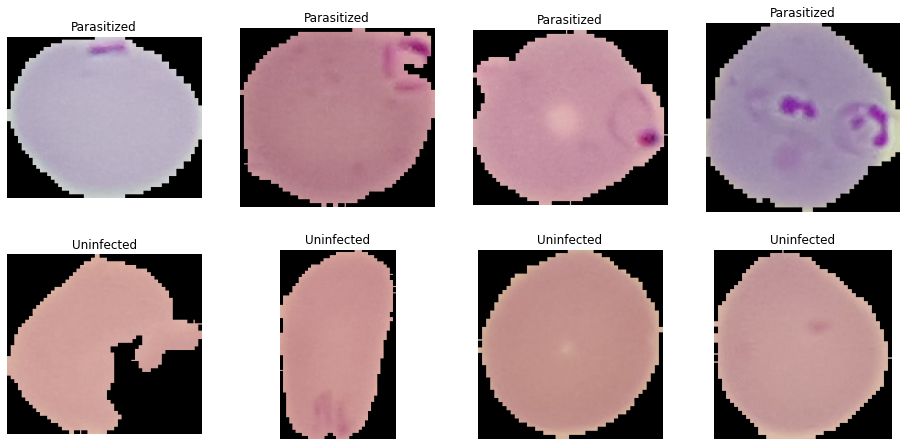

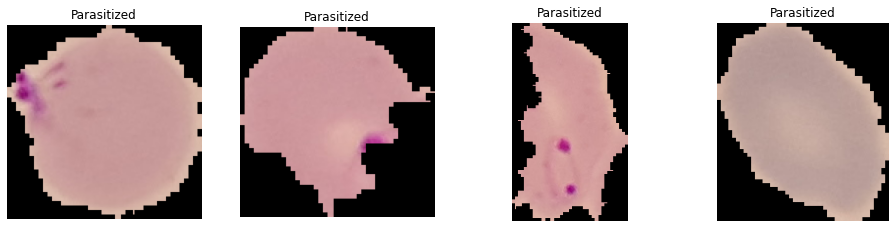

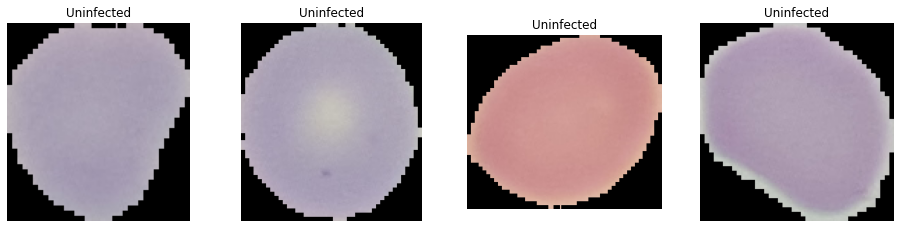

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

#mengambil path data training
Parasitized_dir=os.path.join('/content/model_cell_images/training/Parasitized')
Uninfected_dir=os.path.join('/content/model_cell_images/training/Uninfected')

#memasukkan list ke variabel
Parasitized_image = os.listdir(Parasitized_dir)
Uninfected_image = os.listdir(Uninfected_dir)

fname1 = [os.path.join(Parasitized_dir,fname)
        for fname in Parasitized_image[:4]]

fname2 = [os.path.join(Uninfected_dir,fname)
        for fname in Uninfected_image[:4]]

ncolu = 4
nrow = 2

fig = plt.gcf()

#besar ukuran canvas
fig.set_size_inches(ncolu*4,nrow*4)

for i,fname in enumerate(fname1):
    #susunan gambar dan urutannya
    sp = plt.subplot(2,4,i+1)
    #sumbu
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Parasitized')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Uninfected')
    plt.imshow(img)
    
plt.show()

### 2. Preprocessing

Task perlu dikerjakan:
1. Gather data train dan validation dengan ukuran gambar 100 x 100
2. Tampilkan shape dari data train dan data validation
3. Normalisasi dataset, membuat dan menampilkan hasil dari label encoder

In [ ]:
import cv2
import numpy as np

#mengumpulkan data training
train_data = []
train_label = []
train_dir=os.path.join('/content/model_cell_images/training')

#root,dir,file
for r, d, f in os.walk(train_dir):
    for file in f: 
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            #untuk pelabelan
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
val_data = []
val_label = []

#mengumpulkan data validation
vali_dir=os.path.join('/content/model_cell_images/validation')
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[4]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
#menampilkan shape data train dan validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (19290, 100, 100, 3)
Train Label =  (19290,)
Validation Data =  (8268, 100, 100, 3)
Validation Label =  (8268,)


In [ ]:
#ingat RGB
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
   
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [ ]:
from sklearn.preprocessing import LabelEncoder

#merubah ke interger
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['Uninfected' 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected'
 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(100, 100, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 100x100x3 menjadi vektor
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(18, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                1920064   
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 18)                594       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 19        
Total params: 1,922,757
Trainable params: 1,922,757
Non-trainable params: 0
_________________________________________________

### 4. Evaluasi Model

Task yang perlu dikerjakan:
1. Plot hasil training model berupa hasil validasi akurasi dan validasi loss
2. Buat report klasifikasi beserta dengan keterangan labelnya
4. Tampilkan metric evaluasi yang lebih bervariasi (balanced accuracy, roc, auc etc.) kemudian jelaskan kepada asisten masing-masing dengan detail 
3. **Hasil akurasi model wajib diatas 80%**

In [ ]:
#membandingkan model

from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])
H = model.fit(x_train, y_train, batch_size=32, epochs=100  , validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
603/603 [==============================] - 11s 17ms/step - loss: 0.7176 - acc: 0.5972 - val_loss: 0.6944 - val_acc: 0.5787
Epoch 2/100
603/603 [==============================] - 10s 16ms/step - loss: 0.6271 - acc: 0.6512 - val_loss: 0.6190 - val_acc: 0.6495
Epoch 3/100
603/603 [==============================] - 10s 16ms/step - loss: 0.6262 - acc: 0.6517 - val_loss: 0.6448 - val_acc: 0.6312
Epoch 4/100
603/603 [==============================] - 10s 16ms/step - loss: 0.6152 - acc: 0.6607 - val_loss: 0.6046 - val_acc: 0.6699
Epoch 5/100
603/603 [==============================] - 10s 16ms/step - loss: 0.6067 - acc: 0.6674 - val_loss: 0.6184 - val_acc: 0.6593
Epoch 6/100
603/603 [==============================] - 10s 16ms/step - loss: 0.6015 - acc: 0.6764 - val_loss: 0.6008 - val_acc: 0.6726
Epoch 7/100
603/603 [==============================] - 10s 16ms/step - loss: 0.5989 - acc: 0.6784 - val_loss: 0.5999 - val_acc: 0.6702
Epoch 8/100
603/603 [==============================] - 

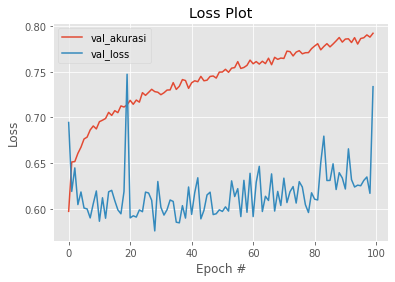

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="val_akurasi")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.74      0.48      0.58      4134
           1       0.61      0.83      0.71      4134

    accuracy                           0.65      8268
   macro avg       0.68      0.65      0.64      8268
weighted avg       0.68      0.65      0.64      8268

